# conversion of XLSX to CSV

In [30]:
import pandas as pd

# Load the train and test datasets from the XLSX files, making sure no rows are skipped
train_df = pd.read_excel('TrainingData.xlsx', header=None)  # No header in the dataset
test_df = pd.read_excel('TestData.xlsx', header=None)    # No header in the dataset

# Replace '?' with NaN (null) in the training data
train_df.replace('?', pd.NA, inplace=True)

# Save the cleaned datasets as CSV files, ensuring no rows are skipped
train_df.to_csv('train_dataset.csv', index=False, header=False)  # Save without headers
test_df.to_csv('test_dataset.csv', index=False, header=False)    # Save without headers

print("Conversion complete. Files saved as 'train_dataset.csv' and 'test_dataset.csv'.")

Conversion complete. Files saved as 'train_dataset.csv' and 'test_dataset.csv'.


# Library

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split


# Dataset Visalization

In [60]:

# Load the train dataset without headers
# We'll manually assign column names: 4 features and 1 label
column_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Label']
train_df = pd.read_csv('train_dataset.csv', header=None, names=column_names)

# Separate features (first 4 columns) and label (last column)
features = train_df.iloc[:, :-1]  # Exclude the last column (labels)

# Convert to numeric where possible (handles missing values and non-numeric data)
features = features.apply(pd.to_numeric, errors='coerce')

# Get summary statistics for the features
summary_stats = features.describe()

# Correlation matrix for the features
correlation_matrix = features.corr()

# Count null values in each feature
null_counts = features.isnull().sum()


print("Shape of train_df:\n", train_df.shape)

# Display the results
print("Summary Statistics (Features Only):\n", summary_stats)
print("\nCorrelation Matrix (Features Only):\n", correlation_matrix)

# Display the count of null values per feature
print("Null values in each feature:\n", null_counts)



Shape of train_df:
 (120, 5)
Summary Statistics (Features Only):
          Feature1    Feature2    Feature3    Feature4
count  118.000000  120.000000  120.000000  119.000000
mean     5.878814    3.052500    3.850833    1.236975
std      0.915848    0.417065    2.083589    0.851705
min      4.300000    2.200000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.400000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max     10.600000    4.400000   16.000000    5.300000

Correlation Matrix (Features Only):
           Feature1  Feature2  Feature3  Feature4
Feature1  1.000000 -0.116982  0.611312  0.570744
Feature2 -0.116982  1.000000 -0.348324 -0.355262
Feature3  0.611312 -0.348324  1.000000  0.800516
Feature4  0.570744 -0.355262  0.800516  1.000000
Null values in each feature:
 Feature1    2
Feature2    0
Feature3    0
Feature4    1
dtype: int64


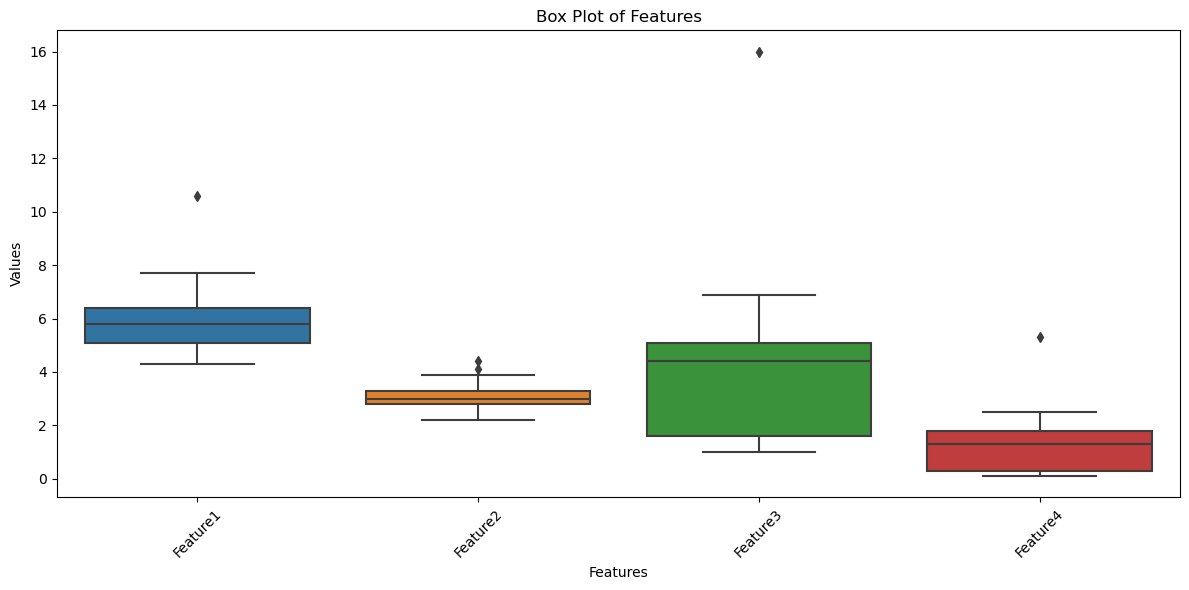

In [61]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a box plot for each feature
sns.boxplot(data=train_df.iloc[:, :-1])  # Exclude the last column (Label)

# Add title and labels
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Removal of NUN and Outlier fro the data

In [62]:
# Calculate the mean for each feature
means = train_df.iloc[:, :-1].mean()

# Replace NaN values with the mean of each feature
train_df.fillna(means, inplace=True)

# Function to replace outliers with mean
def replace_outliers_with_mean(df):
    for column in df.columns[:-1]:  # Exclude the last column (Label)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the mean
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = means[column]
    
    return df

# Replace outliers with mean values
train_df = replace_outliers_with_mean(train_df)

In [63]:
features = train_df.iloc[:, :-1]

# Get summary statistics for the features
summary_stats = features.describe()

# Correlation matrix for the features
correlation_matrix = features.corr()

# Display the results
print("Summary Statistics (Features Only):\n", summary_stats)
print("\nCorrelation Matrix (Features Only):\n", correlation_matrix)

# Count null values in each feature
null_counts = features.isnull().sum()

# Display the count of null values per feature
print("Null values in each feature:\n", null_counts)

Summary Statistics (Features Only):
          Feature1    Feature2    Feature3    Feature4
count  120.000000  120.000000  120.000000  120.000000
mean     5.839470    3.032542    3.749590    1.203116
std      0.797379    0.386086    1.758025    0.761200
min      4.300000    2.200000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.325000    3.300000    5.100000    1.800000
max      7.700000    3.900000    6.900000    2.500000

Correlation Matrix (Features Only):
           Feature1  Feature2  Feature3  Feature4
Feature1  1.000000 -0.138234  0.851684  0.788468
Feature2 -0.138234  1.000000 -0.416478 -0.345858
Feature3  0.851684 -0.416478  1.000000  0.949121
Feature4  0.788468 -0.345858  0.949121  1.000000
Null values in each feature:
 Feature1    0
Feature2    0
Feature3    0
Feature4    0
dtype: int64


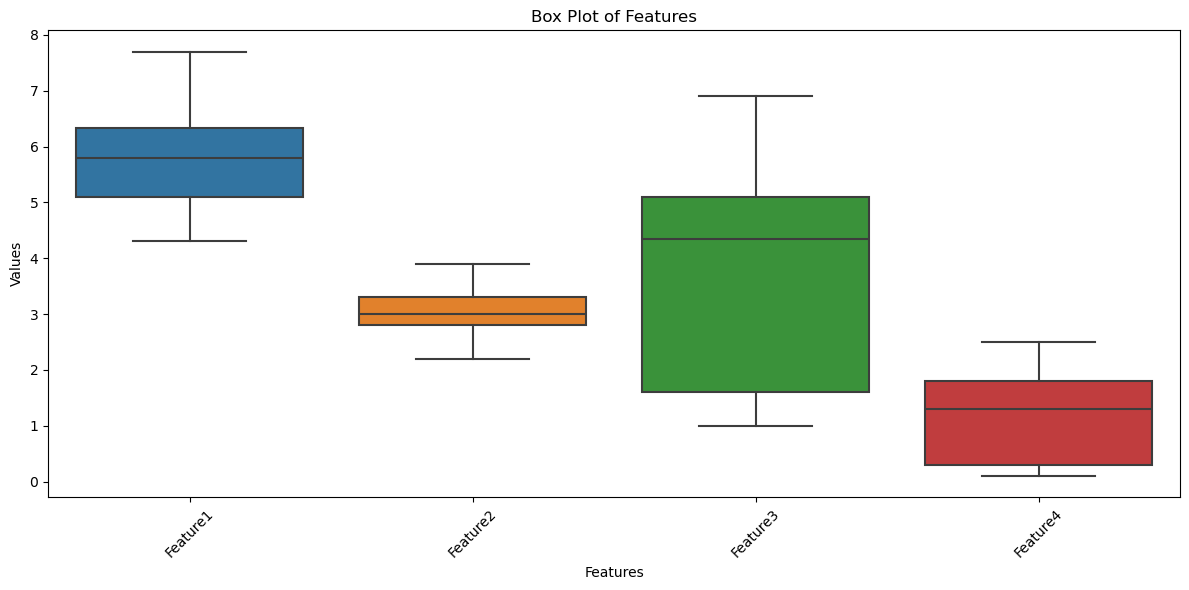

In [64]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a box plot for each feature
sns.boxplot(data=train_df.iloc[:, :-1])  # Exclude the last column (Label)

# Add title and labels
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# SVM Classifier

In [65]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split

# Separate features and labels
X_train = train_df.iloc[:, :-1]  # Features
y_train = train_df['Label']        # Labels

# Load the converted test dataset from CSV without headers
test_df = pd.read_csv('test_dataset.csv', header=None)

# Assign column names manually: 4 features and 1 label
test_df.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4']

# Replace '?' with NaN (null) in test data
test_df.replace('?', pd.NA, inplace=True)

# Convert to numeric where possible
test_df = test_df.apply(pd.to_numeric, errors='coerce')

print(test_df.shape)

# Replace NaN values in test data with the mean of training data
test_df.fillna(means, inplace=True)

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

# Predict labels on the test dataset
predictions = svm_classifier.predict(test_df)

# Print the predicted labels
print("Predicted labels for the test dataset:", predictions)

(30, 4)
Predicted labels for the test dataset: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3]
